## Real Estate Capstone Project

#### Project Task : Week1
#### Data Import and Preparation

##### 1. Import Data

In [1]:
# importing required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
# import required dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head(2)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.0,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.0877
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.0,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.0903


In [5]:
df_test.head(2)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,48239,313,42.346422,-83.252823,2711280,39555,3417,1479,1938,858.57169,859.0,232.39082,276.07497,424.0,1.0,0.95696,0.85316,0.85316,0.85316,0.85316,0.76962,0.63544,435,395,48899.52121,38746.0,44392.20902,798.02401,1180.0,53802.87122,45167.0,43756.56479,464.30972,769.0,1139.24548,1109.0,336.47710,262.67011,474.0,488.51323,436.0,192.75147,271.0,189.18182,0.06443,0.06443,0.07651,0.63624,0.14111,0.55087,0.51965,0.91047,0.92010,0.90391,33.37131,27.83333,22.36768,334.30978,1479.0,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,4210,207,44.100724,-70.257832,14778785,2705204,3796,1846,1950,832.68625,750.0,267.22342,183.32299,245.0,1.0,1.00000,0.86611,0.67364,0.30962,0.30962,0.30962,0.27197,275,239,72335.33234,61008.0,51895.81159,922.82969,1722.0,85642.22095,74759.0,49156.72870,482.99945,1147.0,1533.25988,1438.0,536.61118,373.96188,937.0,661.31296,668.0,201.31365,510.0,279.69697,0.01175,0.01175,0.14375,0.64755,0.52310,0.26442,0.49359,0.94290,0.92832,0.95736,43.88680,46.08333,22.90302,427.10824,1846.0,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377


In [6]:
df_train.shape

(27321, 80)

In [7]:
df_test.shape

(11709, 80)

In [8]:
df_train.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,27321.000000,0.0,27321.0,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,2.732100e+04,2.732100e+04,27321.000000,27321.000000,27321.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27321.000000,27321.000000,27053.000000,27053.000000,27053.000000,27053.000000,27053.000000,27023.000000,27023.000000,27023.000000,27023.000000,27023.000000,26748.000000,26748.000000,26748.000000,26748.000000,26748.000000,26721.000000,26721.000000,26721.000000,26721.000000,26721.000000,26864.000000,26864.000000,26864.000000,26864.000000,26864.000000,26864.000000,26864.000000,27131.000000,27121.000000,27098.000000,27132.000000,27132.000000,27132.000000,27132.000000,27132.000000,27115.000000,27115.000000,27115.000000,27115.000000,27115.000000,27053.000000,27130.000000,27130.000000,27130.000000,27130.000000
mean,257331.996303,NaN,140.0,85.646426,28.271806,50081.999524,596.507668,37.508813,-91.288394,1.295106e+08,6.521754e+06,4316.032685,2123.924820,2192.107866,1055.129032,1007.672789,394.256202,295.979447,548.005702,0.957824,0.867134,0.739429,0.612959,0.499994,0.411007,0.345424,0.254469,574.269390,528.533546,70441.191421,57580.508964,54429.005158,923.580372,1607.974384,78987.539104,69279.801465,50728.337493,533.686966,1063.665988,1629.856392,1551.455735,622.559191,287.552519,669.827389,540.549473,513.383968,218.604647,370.284570,254.722233,0.025695,0.029947,0.100847,0.629190,0.467957,0.477485,0.499458,0.858459,0.852136,0.864931,38.339988,38.074193,21.500301,535.457318,2138.719962,40.319803,40.355099,22.178745,544.238432,2208.761903,0.640434,0.508300,0.047537,0.019089,0.100248
std,21343.859725,NaN,0.0,98.333097,16.392846,29558.115660,232.497482,5.588268,16.343816,1.275531e+09,2.186781e+08,2169.226173,1114.948893,1101.895160,437.430562,443.797814,187.190303,272.203470,461.547524,0.063186,0.109655,0.143799,0.160305,0.164006,0.160201,0.153217,0.137742,466.009996,450.622720,30166.895308,29128.465950,17619.932892,453.057675,751.096015,31386.178602,33472.030541,14239.749880,290.603105,560.873112,623.206122,652.619435,238.068593,195.340264,464.411215,221.339933,231.392365,91.456509,250.727935,189.912748,0.031331,0.034134,0.069304,0.156267,0.294956,0.256125,0.264138,0.112420,0.120746,0.112273,5.602570,7.874651,2.540576,312.922652,1104.593574,5.886317,8.039585,2.540257,283.546896,1089.316999,0.226640,0.136860,0.037640,0.020796,0.049055
min,220342.000000,NaN,140.0,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,0.000000e+00,0.000000,0.000000,0.000000,117.150000,104.000000,18.257420,0.343000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4999.846690,4790.000000,1825.741860,0.114260,3.000000,5374.842520,5278.000000,1825.741860,0.199960,3.000000,234.650000,237.000000,36.514840,0.198400,1.000000,53.594610,53.000000,18.257420,2.000000,0.614040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [9]:
df_test.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,11709.000000,0.0,11709.0,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,1.170900e+04,1.170900e+04,11709.000000,11709.000000,11709.000000,11561.000000,11561.000000,11561.000000,11561.00000,11561.000000,11560.000000,11560.000000,11560.000000,11560.000000,11560.000000,11560.000000,11560.000000,11560.000000,11709.000000,11709.000000,11587.000000,11587.000000,11587.000000,11587.000000,11587.000000,11573.000000,11573.000000,11573.000000,11573.000000,11573.000000,11441.000000,11441.000000,11441.000000,11441.000000,11441.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11624.000000,11620.000000,11604.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11613.000000,11613.000000,11613.000000,11613.000000,11613.000000,11587.000000,11625.000000,11625.000000,11625.000000,11625.000000
mean,257525.004783,NaN,140.0,85.710650,28.489196,50123.418396,593.598514,37.405491,-91.340229,1.095500e+08,5.156069e+06,4367.205995,2152.510804,2214.695192,1054.143003,1007.017646,394.613338,304.51603,563.476256,0.957482,0.867770,0.742615,0.614405,0.501188,0.412992,0.347003,0.255507,588.795969,542.688189,70169.909595,57361.971779,54164.666604,935.084700,1624.344093,78684.992592,69049.818630,50408.173385,540.262293,1073.081483,1636.445391,1559.639018,621.742098,289.285332,673.433004,538.906730,512.067869,217.949778,369.762326,255.189048,0.025789,0.030187,0.101570,0.631615,0.467226,0.475517,0.494432,0.855912,0.849148,0.863003,38.149424,37.833111,21.431971,542.945584,2168.064430,40.111999,40.131864,22.148145,550.411243,2233.003186,0.634194,0.505632,0.047960,0.019346,0.099191
std,21466.372658,NaN,0.0,99.304334,16.607262,29775.134038,232.074263,5.625904,16.407818,7.624940e+08,1.522649e+08,2121.779736,1086.382137,1086.438040,434.549555,441.484366,189.193868,281.31471,474.563369,0.063603,0.107789,0.142514,0.161556,0.165759,0.161312,0.153982,0.137658,477.469706,463.283992,30619.277296,29661.241996,17794.261539,457.759256,747.394839,31979.019465,34130.762923,14349.930513,289.029814,550.898356,634.770720,664.567754,240.815700,197.175161,461.505232,226.307832,237.514474,93.108675,249.644673,190.267726,0.030513,0.033644,0.070412,0.157634,0.296905,0.257148,0.264962,0.114424,0.122605,0.113205,5.579728,7.795907,2.582541,296.016752,1074.723594,5.851192,7.972026,2.554907,280.992521,1072.017063,0.232232,0.139774,0.038693,0.021428,0.048525
min,220336.000000,NaN,140.0,1.000000,1.000000,601.000000,201.000000,17.965835,-166.770979,8.299000e+03,0.000000e+00,0.000000,0.000000,0.000000,147.548100,104.000000,18.257420,0.39279,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4999.846690,4790.000000,1825.741860,0.399920,3.000000,5374.842520,5278.000000,1825.741860,0.266610,4.000000,349.500000,349.000000,36.514840,0.595190,2.000000,53.594610,53.000000,18.257420,2.000000,0.491230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

#####  2.	Figure out the primary key and look for the requirement of indexing.

Unique and not null can only be used as Primary Key

In [12]:
df_train.duplicated().value_counts()

False    27161
True       160
dtype: int64

In [13]:
df_test.duplicated().value_counts()

False    11677
True        32
dtype: int64

Removing duplicates from Datasets

In [14]:
df_train.drop_duplicates(keep='first', inplace = True)
df_test.drop_duplicates(keep='first', inplace = True)

In [15]:
df_train.shape

(27161, 80)

In [16]:
df_test.shape

(11677, 80)

In [17]:
df_train.nunique()  == df_train.shape[0]

UID             True
BLOCKID        False
SUMLEVEL       False
COUNTYID       False
STATEID        False
               ...  
pct_own        False
married        False
married_snp    False
separated      False
divorced       False
Length: 80, dtype: bool

In [18]:
df_test.nunique()  == df_test.shape[0]

UID             True
BLOCKID        False
SUMLEVEL       False
COUNTYID       False
STATEID        False
               ...  
pct_own        False
married        False
married_snp    False
separated      False
divorced       False
Length: 80, dtype: bool

From above UID has Unique values hence UID can considered as Primary Key for dataset

In [19]:
#df_train = df_train.reset_index()

In [20]:
#df_test = df_test.reset_index()

In [21]:
#df_train

3. Missing value Treatment

In [22]:
#This flag will help us split the data back later
df_train['split']= 'Train'
df_test['split']= 'Test'

In [23]:
df_combined=df_train.append(df_test, ignore_index=True)
df_combined.head(2)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.0,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.0877,Train
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.0,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.0903,Train


In [24]:
df_combined.tail(2)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split
38836,241096,NaN,140,27,19,Iowa,IA,Carroll,Carroll City,City,tract,51401,712,42.081366,-94.866175,11066759.0,0,5945,2732,3213,696.93368,576.0,595.16228,503.83775,590.0,0.96886,0.92042,0.83045,0.69723,0.62284,0.43772,0.33737,0.33737,663,578,57877.26387,41838.0,49745.93715,1605.79897,2596.0,75066.29009,72135.0,47200.66016,782.93088,1568.0,1182.30365,1059.0,587.01032,796.11244,1267.0,369.29903,334.0,133.20792,666.0,556.40404,0.0357,0.0357,0.07967,0.65546,0.3001,0.53579,0.47507,0.91407,0.92428,0.90634,39.18219,40.25,24.86317,636.20201,2732.0,45.63179,48.16667,24.84209,693.82905,3213.0,0.83330,0.66699,0.02738,0.0000,0.04694,Test
38837,287763,NaN,140,453,48,Texas,TX,Austin,Sunset Valley City,Town,tract,78745,512,30.219013,-97.774728,1990126.0,0,4117,2070,2047,950.09294,864.0,333.82364,417.07457,675.0,1.00000,0.97481,0.86074,0.73926,0.44593,0.38370,0.27852,0.25778,682,675,58006.33817,44179.0,49189.98590,902.67611,1396.0,54913.24441,42469.0,41016.08651,581.04758,877.0,1364.17379,1318.0,463.57052,217.49287,456.0,550.78197,555.0,199.13527,258.0,163.55556,0.0000,0.0000,0.05042,0.63866,1.0000,0.67315,0.51407,0.78685,0.80615,0.76820,35.56404,35.00,21.67509,522.45931,2070.0,35.99955,35.41667,20.68049,559.30291,2047.0,0.52587,0.51922,0.08066,0.0252,0.10586,Test


In [25]:
df_combined.shape

(38838, 81)

In [26]:
df_combined.isna().sum()

UID                0
BLOCKID        38838
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
married          227
married_snp      227
separated        227
divorced         227
split              0
Length: 81, dtype: int64

In [27]:
# Fill rate of the variables -> (1- missing %)
1-df_combined.isna().sum()/len(df_combined)

UID            1.000000
BLOCKID        0.000000
SUMLEVEL       1.000000
COUNTYID       1.000000
STATEID        1.000000
                 ...   
married        0.994155
married_snp    0.994155
separated      0.994155
divorced       0.994155
split          1.000000
Length: 81, dtype: float64

In [28]:
# BlOCKID is completly missing or Null in both train and test data. So we will drop BLOCKID feature.
df_combined.drop(columns =['BLOCKID'], axis=1, inplace=True)

In [29]:
df_combined.isna().sum()/len(df_combined)*100

UID            0.000000
SUMLEVEL       0.000000
COUNTYID       0.000000
STATEID        0.000000
state          0.000000
                 ...   
married        0.584479
married_snp    0.584479
separated      0.584479
divorced       0.584479
split          0.000000
Length: 80, dtype: float64

In [30]:
# Missing value greater than zero
col_check=df_combined.isna().sum().to_frame().reset_index()
null_col=col_check[col_check[0]>0]['index'].tolist()
null_col

['rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_samples',
 'pct_own',
 'married'

In [31]:
#If the feature have less than 8 unique value then I am consdering as categorical else it will be continuous
for i in null_col:
    print(i)
    if df_combined[i].nunique()>8:      #Continuous data
        df_combined[i].fillna(df_combined[i].median(),inplace=True)    #Bcz median is not impacted by outlier
    else:df_combined[i].fillna(df_combined[i].mode()[0],inplace=True)  #Categorical data

rent_mean
rent_median
rent_stdev
rent_sample_weight
rent_samples
rent_gt_10
rent_gt_15
rent_gt_20
rent_gt_25
rent_gt_30
rent_gt_35
rent_gt_40
rent_gt_50
hi_mean
hi_median
hi_stdev
hi_sample_weight
hi_samples
family_mean
family_median
family_stdev
family_sample_weight
family_samples
hc_mortgage_mean
hc_mortgage_median
hc_mortgage_stdev
hc_mortgage_sample_weight
hc_mortgage_samples
hc_mean
hc_median
hc_stdev
hc_samples
hc_sample_weight
home_equity_second_mortgage
second_mortgage
home_equity
debt
second_mortgage_cdf
home_equity_cdf
debt_cdf
hs_degree
hs_degree_male
hs_degree_female
male_age_mean
male_age_median
male_age_stdev
male_age_sample_weight
male_age_samples
female_age_mean
female_age_median
female_age_stdev
female_age_sample_weight
female_age_samples
pct_own
married
married_snp
separated
divorced


In [32]:
df_combined.isna().sum()/len(df_combined)*100

UID            0.0
SUMLEVEL       0.0
COUNTYID       0.0
STATEID        0.0
state          0.0
              ... 
married        0.0
married_snp    0.0
separated      0.0
divorced       0.0
split          0.0
Length: 80, dtype: float64

In [33]:
df_combined.shape

(38838, 80)

In [34]:
# As we have seen above we have 123 unique UID which are common in both train and test data. so duplicate UID removing them.
df_combined.drop_duplicates(subset=['UID'],inplace=True)
df_combined.shape

(38715, 80)

#### Exploratory Data Analysis (EDA):

Perform debt analysis. You may take the following steps:
 a. Explore the top 2,500 locations where the percentage of households with a 'second mortgage' is the highest and percent ownership     is above 10 percent. 
    Visualize using geo-map.
    You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [35]:
top_2500_loc=df_train[(df_train['second_mortgage']<0.50) & 
                      (df_train['pct_own']>0.10) ].sort_values(by='second_mortgage', ascending=False).head(2500)

In [36]:
top_2500_loc=top_2500_loc[['state','city','state_ab','place','lat','lng']]
top_2500_loc.head()

,state,city,state_ab,place,lat,lng
11980,Massachusetts,Worcester,MA,Worcester City,42.254262,-71.800347
26018,New York,Corona,NY,Harbor Hills,40.751809,-73.853582
7829,Maryland,Glen Burnie,MD,Glen Burnie,39.127273,-76.635265
2077,Florida,Tampa,FL,Egypt Lake-leto,28.029063,-82.495395
1701,Illinois,Chicago,IL,Lincolnwood,41.967289,-87.652434


In [37]:
!pip install geopandas
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [38]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(top_2500_loc, geometry=gpd.points_from_xy(x=top_2500_loc.lng, y=top_2500_loc.lat))
gdf

,state,city,state_ab,place,lat,lng,geometry
11980,Massachusetts,Worcester,MA,Worcester City,42.254262,-71.800347,POINT (-71.80035 42.25426)
26018,New York,Corona,NY,Harbor Hills,40.751809,-73.853582,POINT (-73.85358 40.75181)
7829,Maryland,Glen Burnie,MD,Glen Burnie,39.127273,-76.635265,POINT (-76.63526 39.12727)
2077,Florida,Tampa,FL,Egypt Lake-leto,28.029063,-82.495395,POINT (-82.49540 28.02906)
1701,Illinois,Chicago,IL,Lincolnwood,41.967289,-87.652434,POINT (-87.65243 41.96729)
...,...,...,...,...,...,...,...
17914,North Carolina,Raleigh,NC,Raleigh City,35.757135,-78.704288,POINT (-78.70429 35.75713)
25642,Maryland,Baltimore,MD,Lochearn,39.353095,-76.733315,POINT (-76.73331 39.35310)
24443,California,Manteca,CA,Manteca City,37.732143,-121.242902,POINT (-121.24290 37.73214)
26671,Pennsylvania,Philadelphia,PA,Philadelphia City,40.039070,-75.125135,POINT (-75.12514 40.03907)


•   Use the following bad debt equation:
    Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
    Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage


In [39]:
df_combined['bad_debt'] = df_combined['second_mortgage'] + df_combined['home_equity'] - df_combined['home_equity_second_mortgage']
df_combined.head(10)

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train,0.09408
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train,0.04274
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,39.792202,-86.515246,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train,0.09512
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,18.396103,-66.104169,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train,0.01086
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,39.195573,-96.569366,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.0

Create pie charts to show overall debt and bad debt

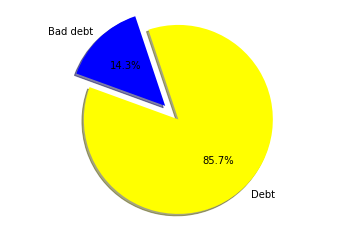

In [40]:
labels = 'Debt', 'Bad debt'
sizes = [df_combined['debt'].mean()*100, df_combined['bad_debt'].mean()*100]
colors = ['yellow', 'blue']
explode = (0.2, 0)  # explode 1st slice

#Plot
plt.pie(sizes,explode=explode,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=160)

plt.axis('equal')
plt.show()

•	Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [41]:
df_combined['good_debt']=df_combined['debt']-df_combined['bad_debt']
df_combined.head(2)

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt,good_debt
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.0,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.0877,Train,0.09408,0.43555
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.0,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.0903,Train,0.04274,0.56581


In [42]:
df_combined.columns

Index(['UID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree',

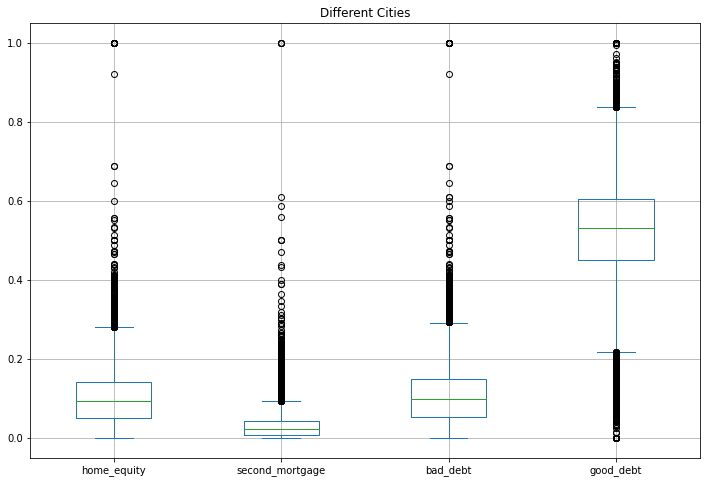

In [43]:
diff_cities = df_combined[['home_equity','second_mortgage','bad_debt', 'good_debt']]
diff_cities.plot.box(figsize=(12,8),grid=True)
plt.title('Different Cities')
plt.show()

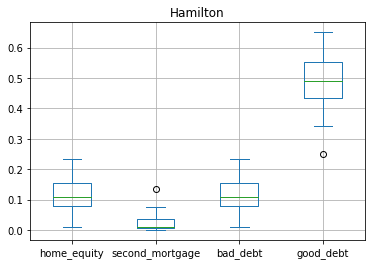

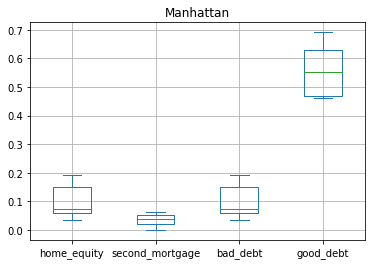

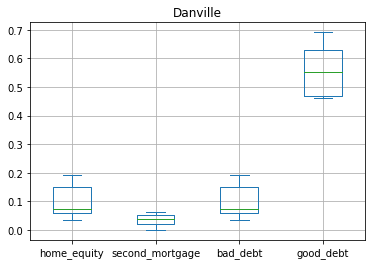

In [44]:
hamilton = df_combined[df_combined['city']=='Hamilton']
hamilton = hamilton[['home_equity','second_mortgage','bad_debt', 'good_debt']]
hamilton.plot.box(grid=True)
plt.title('Hamilton')
plt.show()

Manhattan = df_combined[df_combined['city']=='Manhattan']
Manhattan = Manhattan[['home_equity','second_mortgage','bad_debt', 'good_debt']]
Manhattan.plot.box(grid=True)
plt.title('Manhattan')
plt.show()

Danville = df_combined[df_combined['city']=='Danville']
Danville = Danville[['home_equity','second_mortgage','bad_debt', 'good_debt']]
Manhattan.plot.box(grid=True)
plt.title('Danville')
plt.show()



•	Create a collated income distribution chart for family income, house hold income, and remaining income

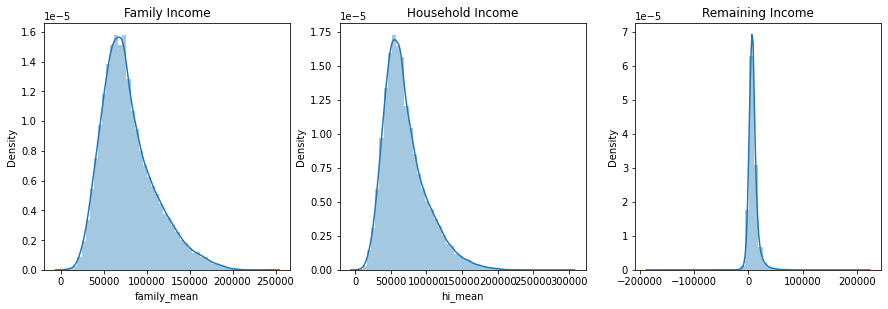

In [45]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.distplot(df_combined['family_mean'])
plt.title('Family Income')

plt.subplot(2,3,2)
sns.distplot(df_combined['hi_mean'])
plt.title('Household Income')

plt.subplot(2,3,3)
sns.distplot(df_combined['family_mean']-df_combined['hi_mean'])
plt.title('Remaining Income')

plt.show()

5.	Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements): 
•	Use pop and ALand variables to create a new field called population density

In [46]:
df_combined['population_density'] = df_combined['pop']/df_combined['ALand']

In [47]:
df_combined.head(2)

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt,good_debt,population_density
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.0,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.0877,Train,0.09408,0.43555,0.000026
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.0,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.0903,Train,0.04274,0.56581,0.001687


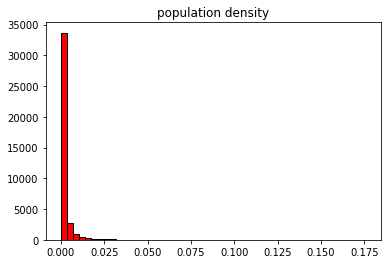

In [48]:
plt.hist(df_combined['population_density'], bins=50, color='red', edgecolor='black')
plt.title('population density')
plt.show()

•	Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

In [49]:
df_combined['median_age']=((df_combined['male_age_median'] * df_combined['male_pop'])
+(df_combined['female_age_median']*df_combined['female_pop']))/(df_combined['male_pop']+df_combined['female_pop'])

In [50]:
df_combined.head(2)

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt,good_debt,population_density,median_age
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.0,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.0877,Train,0.09408,0.43555,0.000026,44.667430
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.0,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.0903,Train,0.04274,0.56581,0.001687,34.722748


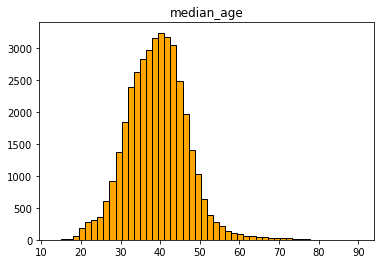

In [51]:
plt.hist(df_combined['median_age'], bins=50, color='orange', edgecolor='black')
plt.title('median_age')
plt.show()

•	Visualize the findings using appropriate chart type

<AxesSubplot: xlabel='population_density', ylabel='Count'>

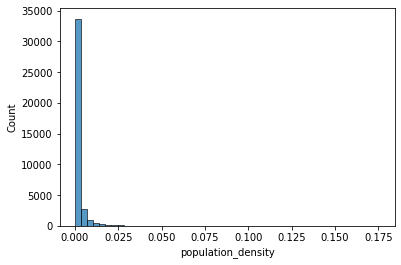

In [52]:
sns.histplot(df_combined['population_density'], bins=50)

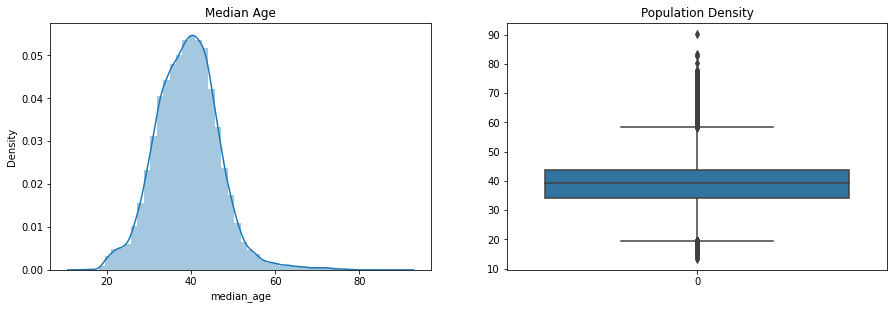

In [53]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df_combined['median_age'])
plt.title('Median Age')
plt.subplot(2,2,2)
sns.boxplot(df_combined['median_age'])
plt.title('Population Density')
plt.show()

6.	Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

In [54]:
df_combined['pop_bins']=pd.cut(df_combined['pop'],bins=5,labels=['very low','low','medium','high','very high'])
df_combined['pop_bins'].value_counts()

very low     38350
low            348
medium          12
high             4
very high        1
Name: pop_bins, dtype: int64

a. Analyze the married, separated, and divorced population for these population brackets

In [55]:
df_combined.groupby(by='pop_bins')[['married','separated','divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,38350,38350,38350
low,348,348,348
medium,12,12,12
high,4,4,4
very high,1,1,1


In [56]:
df_combined.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])

married           separated            divorced         
               mean    median      mean    median      mean   median
pop_bins                                                            
very low   0.508002  0.526710  0.019127  0.013580  0.100325  0.09510
low        0.589247  0.601815  0.014929  0.010255  0.075192  0.06934
medium     0.617047  0.605765  0.011203  0.007745  0.071870  0.06909
high       0.629132  0.675095  0.012372  0.007340  0.060562  0.05987
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.03036

•	Visualize using appropriate chart type

<Figure size 720x360 with 0 Axes>

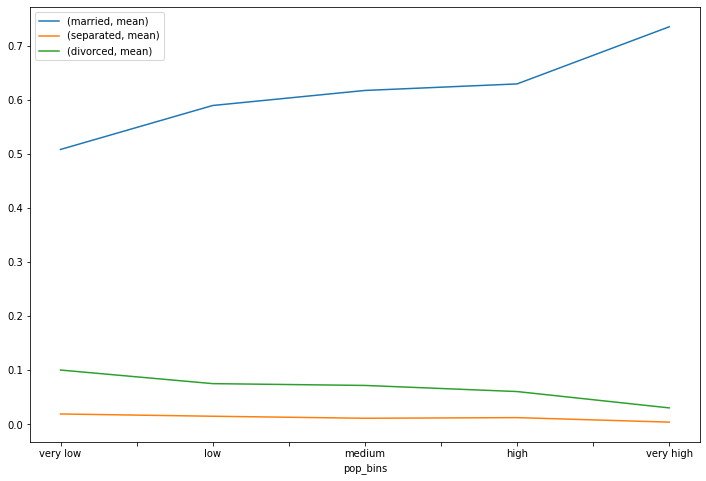

In [57]:
plt.figure(figsize=(10,5))
pop_bin_married=df_combined.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(12,8))
plt.legend(loc='best')
plt.show()

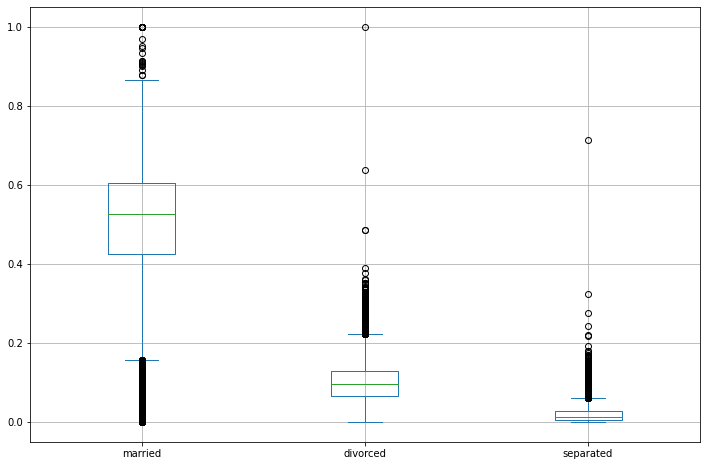

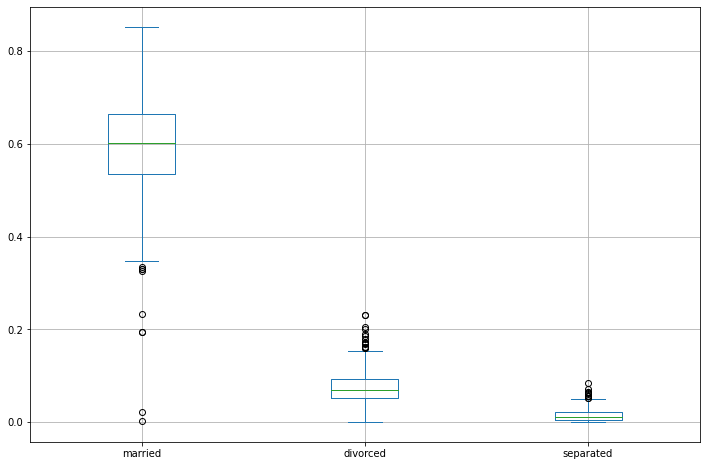

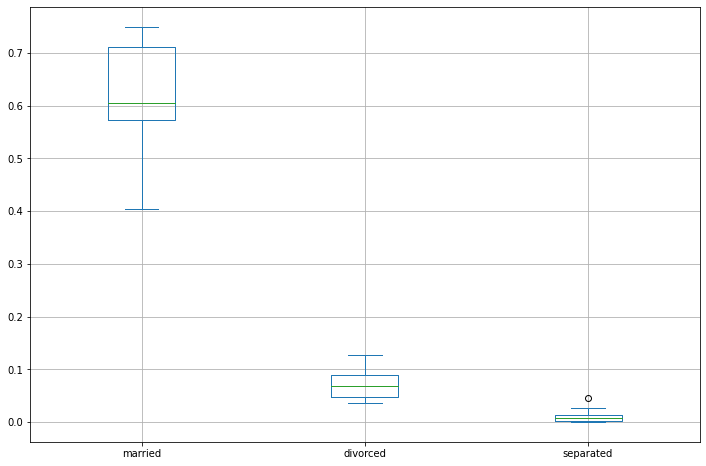

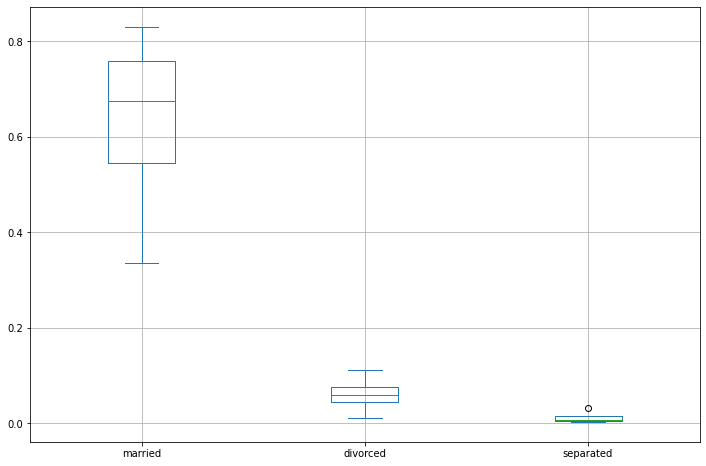

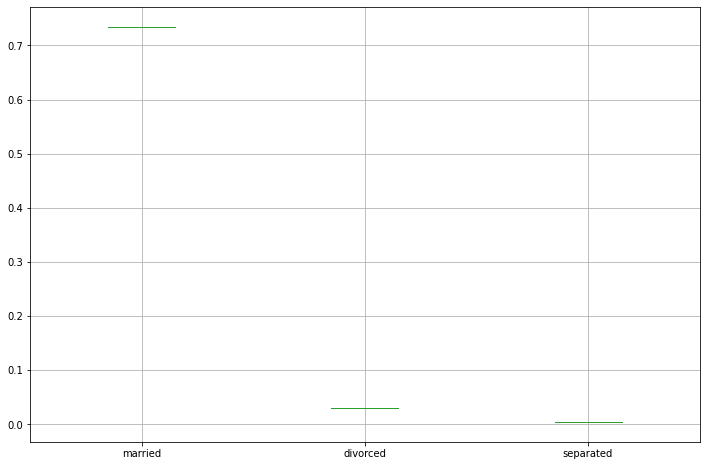

In [58]:
df_combined.groupby(by='pop_bins')[['married','divorced', 'separated']].plot.box(figsize=(12,8),grid='True')
plt.show()

7.	Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [59]:
rent_state_mean = df_combined.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head(10)

,mean
state,
Alabama,765.872568
Alaska,1190.093590
Arizona,1084.510968
Arkansas,716.544999
California,1466.020481
Colorado,1192.839715
Connecticut,1313.616792
Delaware,1102.107261
District of Columbia,1454.149546


In [60]:
income_state_mean=df_combined.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head(10)

,mean
state,
Alabama,65311.673394
Alaska,91911.137520
Arizona,73014.362099
Arkansas,64234.797753
California,87711.782288
Colorado,87728.719535
Connecticut,103260.529612
Delaware,84031.947372
District of Columbia,107123.968906


In [61]:
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']*100
rent_perc_of_income.head(10)

state
Alabama                 1.172643
Alaska                  1.294831
Arizona                 1.485339
Arkansas                1.115509
California              1.671407
Colorado                1.359691
Connecticut             1.272138
Delaware                1.311534
District of Columbia    1.357446
Florida                 1.576094
Name: mean, dtype: float64

In [62]:
sum(df_combined['rent_mean'])/sum(df_combined['family_mean'])

0.013351500156256637

8.	Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

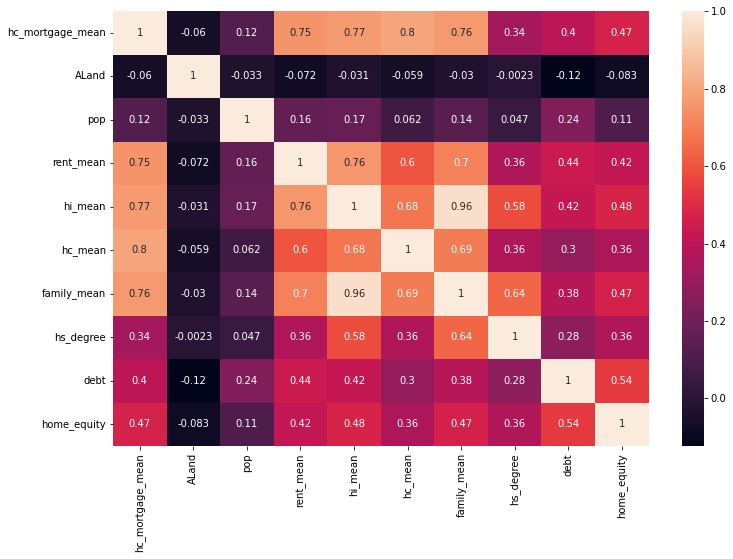

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df_combined[['hc_mortgage_mean','ALand','pop','rent_mean','hi_mean','hc_mean','family_mean',
                           'hs_degree','debt','home_equity']].corr(),annot=True)
plt.show()

In [64]:
df_combined.to_csv('P-1.csv')

rent_mean, hi_mean, hc_mean, family_mean has a good correlation with the target i.e-hc_mortagage_mean


In [65]:
train = df_combined[df_combined['split'] == 'Train']
test = df_combined[df_combined['split'] == 'Test']

In [66]:
train.head(2)

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt,good_debt,population_density,median_age,pop_bins
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.0,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.0877,Train,0.09408,0.43555,0.000026,44.667430,very low
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.0,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.0903,Train,0.04274,0.56581,0.001687,34.722748,very low


In [67]:
test.head(2)

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt,good_debt,population_density,median_age,pop_bins
27161,255504,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,48239,313,42.346422,-83.252823,2711280.0,39555,3417,1479,1938,858.57169,859.0,232.39082,276.07497,424.0,1.0,0.95696,0.85316,0.85316,0.85316,0.85316,0.76962,0.63544,435,395,48899.52121,38746.0,44392.20902,798.02401,1180.0,53802.87122,45167.0,43756.56479,464.30972,769.0,1139.24548,1109.0,336.47710,262.67011,474.0,488.51323,436.0,192.75147,271.0,189.18182,0.06443,0.06443,0.07651,0.63624,0.14111,0.55087,0.51965,0.91047,0.92010,0.90391,33.37131,27.83333,22.36768,334.30978,1479.0,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299,Test,0.07651,0.55973,0.001260,31.189053,very low
27162,252676,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,4210,207,44.100724,-70.257832,14778785.0,2705204,3796,1846,1950,832.68625,750.0,267.22342,183.32299,245.0,1.0,1.00000,0.86611,0.67364,0.30962,0.30962,0.30962,0.27197,275,239,72335.33234,61008.0,51895.81159,922.82969,1722.0,85642.22095,74759.0,49156.72870,482.99945,1147.0,1533.25988,1438.0,536.61118,373.96188,937.0,661.31296,668.0,201.31365,510.0,279.69697,0.01175,0.01175,0.14375,0.64755,0.52310,0.26442,0.49359,0.94290,0.92832,0.95736,43.88680,46.08333,22.90302,427.10824,1846.0,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377,Test,0.14375,0.50380,0.000257,46.382991,very low


### Project Task: Week 2
### Data Pre-processing:

1. 	The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 

2. 	Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. 

Following are the list of latent variables:

•	Highschool graduation rates

•	Median population age

•	Second mortgage statistics

•	Percent own

•	Bad debt expense


In [68]:
!pip install factor_analyzer

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [69]:
import numpy as np
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [70]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
UID,27161.0,257328.592209,21342.667653,220342.0,238826.000000,257212.000000,275810.000000,294334.00000
BLOCKID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUMLEVEL,27161.0,140.000000,0.000000,140.0,140.000000,140.000000,140.000000,140.00000
COUNTYID,27161.0,85.660322,98.373195,1.0,29.000000,63.000000,109.000000,840.00000
STATEID,27161.0,28.267185,16.385918,1.0,13.000000,28.000000,42.000000,72.00000
...,...,...,...,...,...,...,...,...
pct_own,26954.0,0.642269,0.224184,0.0,0.505040,0.691585,0.817673,1.00000
married,27011.0,0.509312,0.135701,0.0,0.426550,0.527230,0.606055,1.00000
married_snp,27011.0,0.047344,0.037156,0.0,0.020825,0.038770,0.064895,0.71429
separated,27011.0,0.019073,0.020744,0.0,0.004555,0.013460,0.027460,0.71429


In [71]:
#fa = FactorAnalyzer(n_factors=5)
#fa.fit_transform(df_train.select_dtypes(exclude= ('object','category')))
#fa.loadings_

## Data Modeling :


3.	Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. 
       Please refer deplotment_RE.xlsx. Column hc_mortgage_mean is predicted variable. This is the mean monthly mortgage and owner costs of specified geographical location.
       Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean. 
       a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.
       b) Run another model at State level. There are 52 states in USA.
       c) Keep below considerations while building a linear regression model:

•	Variables should have significant impact on predicting Monthly mortgage and owner costs

•	Utilize all predictor variable to start with initial hypothesis

•	R square of 60 percent and above should be achieved

•	Ensure Multi-collinearity does not exist in dependent variables

•	Test if predicted variable is normally distributed
 


In [72]:
train.columns

Index(['UID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree',

In [73]:
train['type'].unique()

array(['City', 'Urban', 'Town', 'CDP', 'Village', 'Borough'], dtype=object)

In [74]:
type_dict={'type':{'City':1, 'Urban':2, 'Town':3, 'CDP':4, 'Village':5, 'Borough':6}}
train.replace(type_dict,inplace=True)

In [75]:
test.replace(type_dict,inplace=True)

In [76]:
train['type'].unique()

array([1, 2, 3, 4, 5, 6])

In [77]:
test['type'].unique()

array([4, 1, 6, 3, 5, 2])

In [78]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean','second_mortgage', 'home_equity', 'debt','hs_degree',
              'pct_own', 'married','separated', 'divorced']

In [79]:
X_train = train[feature_cols]
y_train = train['hc_mortgage_mean']

In [80]:
X_test = test[feature_cols]
y_test = test['hc_mortgage_mean']

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score

In [82]:
X_train.head(2)

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,pct_own,married,separated,divorced
0,53,36,13346,1,5230,67994.14790,0.02077,0.08919,0.52963,0.89288,0.79046,0.57851,0.01240,0.0877
1,141,18,46616,1,2633,50670.10337,0.02222,0.04274,0.60855,0.90487,0.52483,0.34886,0.01426,0.0903


In [83]:
X_test.head(2)

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,pct_own,married,separated,divorced
27161,163,26,48239,4,3417,53802.87122,0.06443,0.07651,0.63624,0.91047,0.70252,0.28217,0.03813,0.14299
27162,1,23,4210,1,3796,85642.22095,0.01175,0.14375,0.64755,0.94290,0.85128,0.64221,0.00000,0.13377


In [84]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [85]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [86]:
y_pred= lr.predict(X_test_scaled)

In [87]:
r2_score(y_test,y_pred)

0.7381843831191806

R Square of above 60 % is achieved.

In [88]:
mean_absolute_error(y_test, y_pred)

233.87107809549642

In [89]:
mean_squared_error(y_test, y_pred) 

103820.22842724771

In [90]:
np.sqrt(mean_squared_error(y_test,y_pred))

322.21146538763594

In [91]:
r2_score(y_train, lr.predict(X_train_scaled))

0.7343400491358771

In [92]:
lr.coef_

array([ -28.50905152,  -21.7110459 ,  -22.98421445,  -57.43072313,
         -4.78167778,  558.73814723,   -0.56122567,   70.89003828,
         12.81881543, -113.18538434, -176.51471006,    8.1107273 ,
          5.24319521,  -55.79370511])

In [93]:
X_train.columns

Index(['COUNTYID', 'STATEID', 'zip_code', 'type', 'pop', 'family_mean',
       'second_mortgage', 'home_equity', 'debt', 'hs_degree', 'pct_own',
       'married', 'separated', 'divorced'],
      dtype='object')

In [94]:
state = train['STATEID'].unique()
state

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10])

In [95]:
for i in [11,1,29]:
    print("State ID-",i)
    
    X_train_nation = train[train['COUNTYID'] == i][feature_cols]
    y_train_nation = train[train['COUNTYID'] == i]['hc_mortgage_mean']
    
    X_test_nation = test[test['COUNTYID'] == i][feature_cols]
    y_test_nation = test[test['COUNTYID'] == i]['hc_mortgage_mean']
    
    X_train_scaled_nation = sc.fit_transform(X_train_nation)
    X_test_scaled_nation = sc.fit_transform(X_test_nation)
    
    lr.fit(X_train_scaled_nation,y_train_nation)
    y_pred_nation = lr.predict(X_test_scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID- 11
Overall R2 score of linear regression model for state, 11 :- 0.7459039215483687
Overall RMSE of linear regression model for state, 11 :- 238.51906236063815


State ID- 1
Overall R2 score of linear regression model for state, 1 :- 0.80861461310093
Overall RMSE of linear regression model for state, 1 :- 311.5346317169071


State ID- 29
Overall R2 score of linear regression model for state, 29 :- 0.7089947086337807
Overall RMSE of linear regression model for state, 29 :- 270.07228257987407




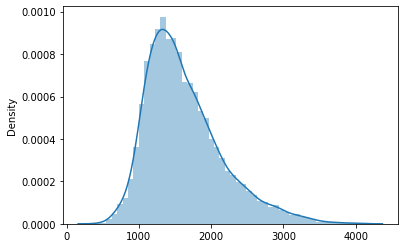

In [96]:
sns.distplot(y_pred)
plt.show()

## Data Reporting:

4.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

•	Box plot of distribution of average rent by type of place (village, urban, town, etc.).

•	Pie charts to show overall debt and bad debt.

•	Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership    is above 10 percent. Visualize using geo-map.

•	Heat map for correlation matrix.

•	Pie chart to show the population distribution across different types of places (village, urban, town etc.).
 


[realestatetab.png](attachment)